# Thư Viện


In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler,LabelEncoder
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.impute import SimpleImputer
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Đọc dữ liệu

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

In [ ]:
cd /content/drive/MyDrive/chuyen de

/content/drive/MyDrive/chuyen de


In [ ]:
ls

KLTN/


In [ ]:
# import zipfile

# with zipfile.ZipFile('/content/drive/MyDrive/chuyen de/KLTN.zip', 'r') as zip_ref:
#     zip_ref.extractall('/content/drive/MyDrive/chuyen de')

# # Hiển thị danh sách các tệp sau khi giải nén

In [ ]:
print("Các tệp sau khi giải nén:")
print(os.listdir('/content/drive/MyDrive/chuyen de/KLTN'))

Các tệp sau khi giải nén:
['a594c8d0fc2c32143904e2250c97a3b9.csv', 'a599db325c0ea95a5d2cbf166bd4f146.csv', 'a5aa25da0716b23ef6e45eea0c45fdf8.csv', 'a5b7be1abd02893d5d38fafb88803c47.csv', 'a5f45f247ea4a498913a6383ef88fdaa.csv', 'a5d33fafe0df4d1fe044c3e8909374e5.csv', 'a6124bb49c6afa1e5f1cf53d3359194d.csv', 'a6143f9f1eed168bd494b4ca898dd3a4.csv', 'a5fe6ecab589b57be4f20d0afc7b10df.csv', 'a6346859f48ca0b37e60d1c1c8d2d6f3.csv', 'a621cabbb45fb0710c7f442e8c1304f6.csv', 'a66d9f81d66c0a23a013274eb0fde48f.csv', 'a6388df7b041a3c7f96f9ba63fc71f4d.csv', 'a67746facb6d94e5b2838b7a7a993887.csv', 'a6916dca4424fbcc1f9bd93db6f382a3.csv', 'a6a5161f0b12299bba9f587ac06585e5.csv', 'a6aba593c9ebcd200c6322fd3d8842d7.csv', 'a6c1c393ab2e59691f1644a226fa4ada.csv', 'a6b29387b581e7f10a86ab4cf5bd237b.csv', 'a6da56caad1dbc54e468500a131b27f2.csv', 'a6d27bf48ae80c8eb4140b07bffa9d77.csv', 'a6dcdc997dae517585998744c779015e.csv', 'a7060a33acda4c07f718f8482d01727b.csv', 'a6ff17e1fa01c403b8baf69500136607.csv', 'a6f5d83206fb

In [ ]:
len(os.listdir('/content/drive/MyDrive/chuyen de/KLTN'))

2900

In [ ]:
def calculate_gpa(df_new):
  tong_diem = 0
  tong_tin = 0
  mon_chua_qua = []

  mon_ = df_new.columns.get_level_values('Tên HP')
  tin_ = df_new.columns.get_level_values('Số TC')

  for i in range(len(tin_)):
    diem = df_new.iloc[0]
    if diem[i] > 4.0 :
      tong_diem += diem[i]*tin_[i]
      tong_tin += tin_[i]
    # else :
    #   mon_chua_qua.append([mon_[i],tin_[i]])

  # print('Tổng tín đã học qua : ',tong_tin)
  # for v in mon_chua_qua :
  #   print('Môn chưa qua :',v[0] ,', TC :',v[1])
  if tong_tin <= 0 : return 0
  gpa =  tong_diem / tong_tin
  return gpa



In [ ]:
file_nganh_ = pd.read_csv('/content/drive/MyDrive/CDTN K2 Chủ đề 9/Nganh.csv')

In [ ]:
dfs = []

def split_(nganh):
    letters = ''.join([char for char in nganh if char.isalpha()])
    numbers = ''.join([char for char in nganh if char.isdigit()])
    return letters, numbers

for i,row in file_nganh_.iterrows():
    file_name = row['hash']+'.csv'
    row_nganh = row['Nganh']

    csv_file_path = os.path.join('/content/drive/MyDrive/chuyen de/KLTN',file_name)

    csv_df = pd.read_csv(csv_file_path)

    csv_df_new = csv_df.pivot_table(values='Điểm', columns= ['Tên HP','Số TC','Mã HP'])
    csv_df_new = csv_df_new.reset_index(drop=True)
    csv_df_new['GPA'] = calculate_gpa(csv_df_new)

    nganh, khoa  = split_(row_nganh)
    csv_df_new['Ngành'] = nganh
    csv_df_new['Khoa'] = khoa


    dfs.append(csv_df_new)



In [ ]:
len(dfs)

2961

In [ ]:
dfs[2959]

Tên HP,GDTC: Thể dục cơ bản,"Logic, suy luận toán học và kỹ thuật đếm",Pháp luật đại cương,Tin đại cương,Tiếng Anh sơ cấp 1,Tiếng Việt thực hành,Triết học Mác - Lênin,GPA,Ngành,Khoa
Số TC,1,3,2,2,2,2,3,,,
Mã HP,PG118,MA101,SH131,CS100,GE111,VL101,ML113,,,
0,5.1,4.8,-1.0,3.2,6.4,6.7,-1.0,5.7125,TT,36


In [ ]:
merged_df = pd.concat(dfs)

In [ ]:
merged_df = merged_df.reset_index(drop=True)

In [ ]:
nganh_pop = merged_df.pop('Ngành')
merged_df.insert(0,'Ngành',nganh_pop)

khoa_pop = merged_df.pop('Khoa')
merged_df.insert(1,'Khóa',khoa_pop)

gpa_pop = merged_df.pop('GPA')
merged_df['GPA'] = gpa_pop

In [ ]:
bins = [0, 4, 5.4, 6.9, 8.4, 10] # Các ngưỡng điểm trung bình
labels = ['F', 'D', 'C', 'B', 'A']  # Nhãn tương ứng với các khoảng điểm

# Chuyển đổi điểm trung bình thành điểm chữ và gán lại cho cột 'Điểm trung bình'
merged_df['Grade'] = pd.cut(merged_df['GPA'], bins=bins, labels=labels, right=True, include_lowest=True)

In [ ]:
merged_df

Tên HP,Ngành,Khóa,Chương trình dịch,Công nghệ phần mềm,Cơ sở dữ liệu,Cơ sở dữ liệu 2,Cơ sở dữ liệu phân tán,Cấu trúc dữ liệu 1,Cấu trúc dữ liệu 2,Giao diện người máy,...,Tiếng Nhật trung cấp 2,Tiếng Nhật trung cấp 3,Tiếng Nhật truyền thông,Tiếng Nhật văn phòng,Văn bản tiếng Nhật,Văn hóa Nhật Bản 1,Văn học Nhật Bản 1,Đất nước học Nhật Bản,GPA,Grade
Số TC,,,2,2,3,2,2,2,2,2,...,4,4,3,2,3,2,2,2,,
Mã HP,,,CF302B,SE302,IS222,IS223A,IS224A,CF212A,CF212B,MI414,...,GJ242,GJ243,AJ461,IP303,AJ315,AJ214,AJ408,AJ311,,
0,T,10,5.0,8.0,5.0,6.0,6.0,3.8,3.2,5.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.882653,C
1,T,10,5.0,6.1,5.7,1.0,NaN,0.0,NaN,6.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.257843,C
2,T,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,F
3,T,8,5.0,0.0,6.0,NaN,6.0,5.0,-1.0,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.071831,C
4,TA,33,NaN,NaN,8.3,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.257447,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2956,TT,36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.953846,B
2957,TT,36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.987500,C


In [ ]:
# new_file_path = os.path.join('/content/drive/MyDrive/chuyen de','data_moi_moi.csv')
# merged_df.to_csv(new_file_path)

#DS môn

In [ ]:
ds_mon = pd.read_excel('/content/drive/MyDrive/CDTN K2 Chủ đề 9/DanhSachMon.xlsx')
ds_mon


,NÄƒm,MÃ£ mÃ´n,Sá»‘ tÃ­n,NgÃ nh
0,2011,MA102,3,TI
1,2011,CS100,2,TI
2,2011,MA110,3,TI
3,2011,MA111,3,TI
4,2011,MA120,3,TI
...,...,...,...,...
1215,2019,IP403,2,TE
1216,2019,IS499,6,TE
1217,2019,IS484,6,TE
1218,2019,NW439,6,TE


In [ ]:
cols = ['Năm','Mã môn','Số tín','Ngành']
ds_mon.columns = cols

In [ ]:
ds_mon['Ngành'].unique()

array(['TI', 'TC', 'TE', 'TM', 'TT'], dtype=object)

In [ ]:
grouped_data = ds_mon.groupby('Mã môn')

In [ ]:
grouped_data

In [ ]:
changed_courses = []
for ma_mon_hoc, group in grouped_data:
    tin_chi_set = group['Số tín'].unique()
    nganh_hoc_set = group['Ngành'].unique()

    if len(tin_chi_set) > 1 or len(nganh_hoc_set) > 1:
        changed_courses.append({
            'ma_mon_hoc': ma_mon_hoc,
            'tin_chi_truoc': list(tin_chi_set),
            'nganh_hoc_truoc': list(nganh_hoc_set),
            'tin_chi_sau': group.loc[group['Năm'] == 2019, 'Số tín'].values,
            'nganh_hoc_sau': group.loc[group['Năm'] == 2019, 'Ngành'].values
        })

# Bước 4: Xuất kết quả ra file CSV
changed_courses_df = pd.DataFrame(changed_courses)

In [ ]:
changed_courses_df['ma_mon_hoc']

0     CF201
1     CF211
2     CF212
3     CF231
4     CF320
      ...  
68    TC416
69    TC417
70    TC418
71    TC420
72    TC421
Name: ma_mon_hoc, Length: 73, dtype: object

In [ ]:
ma_hp_list = merged_df.columns.get_level_values('Mã HP').tolist()

ma_hp_list.index('CF201')

217

In [ ]:
changed_courses_df

,ma_mon_hoc,tin_chi_truoc,nganh_hoc_truoc,tin_chi_sau,nganh_hoc_sau
0,CF201,[3],"[TI, TC, TM]",[],[]
1,CF211,[2],"[TI, TT]","[2, 2]","[TI, TT]"
2,CF212,"[4, 3]","[TI, TC, TM, TE, TT]","[3, 3, 3, 3]","[TI, TT, TC, TE]"
3,CF231,[2],"[TC, TI]","[2, 2]","[TI, TC]"
4,CF320,"[2, 3]",[TC],[3],[TC]
...,...,...,...,...,...
68,TC416,"[3, 2]",[TC],[],[]
69,TC417,"[3, 2]",[TC],[],[]
70,TC418,"[3, 2]",[TC],[2],[TC]
71,TC420,"[3, 2]",[TC],[2],[TC]


In [ ]:
ma_hp_list.index('CS314')

137

In [ ]:
merged_df.columns[137]

('Lập trình ứng dụng di động', 2, 'CS314')

In [ ]:
merged_df['Khóa'] = (merged_df['Khóa']).astype(int)

In [ ]:
df = (merged_df.sort_values(by='Khóa'))

In [ ]:
df

Tên HP,Ngành,Khóa,Chương trình dịch,Công nghệ phần mềm,Cơ sở dữ liệu,Cơ sở dữ liệu 2,Cơ sở dữ liệu phân tán,Cấu trúc dữ liệu 1,Cấu trúc dữ liệu 2,Giao diện người máy,...,Tiếng Nhật trung cấp 2,Tiếng Nhật trung cấp 3,Tiếng Nhật truyền thông,Tiếng Nhật văn phòng,Văn bản tiếng Nhật,Văn hóa Nhật Bản 1,Văn học Nhật Bản 1,Đất nước học Nhật Bản,GPA,Grade
Số TC,,,2,2,3,2,2,2,2,2,...,4,4,3,2,3,2,2,2,,
Mã HP,,,CF302B,SE302,IS222,IS223A,IS224A,CF212A,CF212B,MI414,...,GJ242,GJ243,AJ461,IP303,AJ315,AJ214,AJ408,AJ311,,
3,T,8,5.0,0.0,6.0,NaN,6.0,5.0,-1.0,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.071831,C
0,T,10,5.0,8.0,5.0,6.0,6.0,3.8,3.2,5.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.882653,C
1,T,10,5.0,6.1,5.7,1.0,NaN,0.0,NaN,6.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.257843,C
2,T,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,F
971,TI,13,6.0,4.0,1.0,5.0,NaN,5.0,-1.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.664286,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1876,TI,36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.670833,A
1875,TI,36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.813636,B


In [ ]:
df['Cơ sở dữ liệu 2']

Số TC,2
Mã HP,IS223A
3,NaN
0,6.0
1,1.0
2,NaN
971,5.0
...,...
1876,NaN
1875,NaN
1874,NaN


In [ ]:
danh_sach = [0,1]
ma = df.columns.get_level_values('Mã HP').tolist()
for i in ma:
  if i in changed_courses_df['ma_mon_hoc'].tolist():
    danh_sach.append(ma.index(i))

In [ ]:
danh_sach.append(546)
danh_sach.append(547)

In [ ]:
len(danh_sach)

66

# Các môn có trong tệp CTDT


In [ ]:
df_new = df.iloc[:,danh_sach]
df_new

Tên HP,Ngành,Khóa,Công nghệ phần mềm,Cơ sở dữ liệu,Giao diện người máy,Lập trình PHP,Lập trình hướng đối tượng,Mạng máy tính,Nguyên lý hệ điều hành,Ngôn ngữ lập trình,...,CĐTN: An toàn mạng,Kiểm thử và đảm bảo chất lượng phần mềm,CĐTN: Cơ sở dữ liệu,Mã hóa và an toàn dữ liệu,Quản lý dự án phần mềm,Hệ thống thông tin nâng cao,Quản lý dự án hệ thống thông tin,Project,GPA,Grade
Số TC,,,2,3,2,3,3,2,3,3,...,6,3,6,2,3,2,3,3,,
Mã HP,,,SE302,IS222,MI414,CS325,CS122,NW212,CS315,CS121,...,NW439,SE312,IS484,MI311,SE422,IS383,IS334,SE380,,
3,T,8,0.0,6.0,7.0,4.0,NaN,5.5,6.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.071831,C
0,T,10,8.0,5.0,5.7,9.0,5.3,5.0,5.0,6.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.882653,C
1,T,10,6.1,5.7,6.7,NaN,5.5,3.5,5.0,5.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.257843,C
2,T,10,NaN,NaN,NaN,-1.0,NaN,NaN,-1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,F
971,TI,13,4.0,1.0,5.0,NaN,5.0,NaN,5.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.664286,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1876,TI,36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.670833,A
1875,TI,36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.813636,B


In [ ]:
df_new = df_new.reset_index(drop=True)

In [ ]:
df_new.drop(df_new.index[df_new.loc[df_new['Grade'] == 'F'].index])

Tên HP,Ngành,Khóa,Công nghệ phần mềm,Cơ sở dữ liệu,Giao diện người máy,Lập trình PHP,Lập trình hướng đối tượng,Mạng máy tính,Nguyên lý hệ điều hành,Ngôn ngữ lập trình,...,CĐTN: An toàn mạng,Kiểm thử và đảm bảo chất lượng phần mềm,CĐTN: Cơ sở dữ liệu,Mã hóa và an toàn dữ liệu,Quản lý dự án phần mềm,Hệ thống thông tin nâng cao,Quản lý dự án hệ thống thông tin,Project,GPA,Grade
Số TC,,,2,3,2,3,3,2,3,3,...,6,3,6,2,3,2,3,3,,
Mã HP,,,SE302,IS222,MI414,CS325,CS122,NW212,CS315,CS121,...,NW439,SE312,IS484,MI311,SE422,IS383,IS334,SE380,,
0,T,8,0.0,6.0,7.0,4.0,NaN,5.5,6.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.071831,C
1,T,10,8.0,5.0,5.7,9.0,5.3,5.0,5.0,6.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.882653,C
2,T,10,6.1,5.7,6.7,NaN,5.5,3.5,5.0,5.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.257843,C
4,TI,13,4.0,1.0,5.0,NaN,5.0,NaN,5.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.664286,C
5,TI,13,-1.0,8.0,8.0,NaN,5.0,6.0,6.0,7.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.056604,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2956,TI,36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.670833,A
2957,TI,36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.813636,B


In [ ]:
df_new.head()

Tên HP,Ngành,Khóa,Công nghệ phần mềm,Cơ sở dữ liệu,Giao diện người máy,Lập trình PHP,Lập trình hướng đối tượng,Mạng máy tính,Nguyên lý hệ điều hành,Ngôn ngữ lập trình,...,CĐTN: An toàn mạng,Kiểm thử và đảm bảo chất lượng phần mềm,CĐTN: Cơ sở dữ liệu,Mã hóa và an toàn dữ liệu,Quản lý dự án phần mềm,Hệ thống thông tin nâng cao,Quản lý dự án hệ thống thông tin,Project,GPA,Grade
Số TC,,,2,3,2,3,3,2,3,3,...,6,3,6,2,3,2,3,3,,
Mã HP,,,SE302,IS222,MI414,CS325,CS122,NW212,CS315,CS121,...,NW439,SE312,IS484,MI311,SE422,IS383,IS334,SE380,,
0,T,8,0.0,6.0,7.0,4.0,NaN,5.5,6.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.071831,C
1,T,10,8.0,5.0,5.7,9.0,5.3,5.0,5.0,6.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.882653,C
2,T,10,6.1,5.7,6.7,NaN,5.5,3.5,5.0,5.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.257843,C
3,T,10,NaN,NaN,NaN,-1.0,NaN,NaN,-1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,F
4,TI,13,4.0,1.0,5.0,NaN,5.0,NaN,5.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.664286,C


In [ ]:
df_new.columns

MultiIndex([(                                   'Ngành', '',      ''),
            (                                    'Khóa', '',      ''),
            (                      'Công nghệ phần mềm',  2, 'SE302'),
            (                           'Cơ sở dữ liệu',  3, 'IS222'),
            (                     'Giao diện người máy',  2, 'MI414'),
            (                           'Lập trình PHP',  3, 'CS325'),
            (               'Lập trình hướng đối tượng',  3, 'CS122'),
            (                           'Mạng máy tính',  2, 'NW212'),
            (                  'Nguyên lý hệ điều hành',  3, 'CS315'),
            (                      'Ngôn ngữ lập trình',  3, 'CS121'),
            (      'Phân tích thiết kế hướng đối tượng',  3, 'IS332'),
            (                            'Toán rời rạc',  3, 'MI201'),
            (                                  'Đồ họa',  2, 'MI312'),
            (               'CĐTN: Phát triển phần mềm',  6, 'SE487'),
      

In [ ]:
# Đảm bảo rằng GPA và Grade nằm ở đúng cấp độ
df_new.columns = df_new.columns.droplevel([1, 2])

# Drop rows with missing GPA
df_new = df_new.dropna(subset=['GPA'])

# Prepare the feature matrix X and target vector y
X = df_new.drop(['GPA', 'Grade'], axis=1)
y = df_new['Grade']

In [ ]:
# Mã hóa các biến phân loại
label_encoders = {}
for column in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    label_encoders[column] = le

In [ ]:
# Xử lý các giá trị thiếu bằng cách thay thế bằng giá trị trung bình của cột
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

In [ ]:
from sklearn.decomposition import PCA
# Số lượng thành phần chính bạn muốn giữ lại
n_components = 10  # Thay đổi số lượng thành phần chính tùy theo yêu cầu của bạn
# Khởi tạo PCA với số lượng thành phần chính
pca = PCA(n_components=n_components)
# Fit và chuyển đổi dữ liệu
X_pca = pca.fit_transform(X)

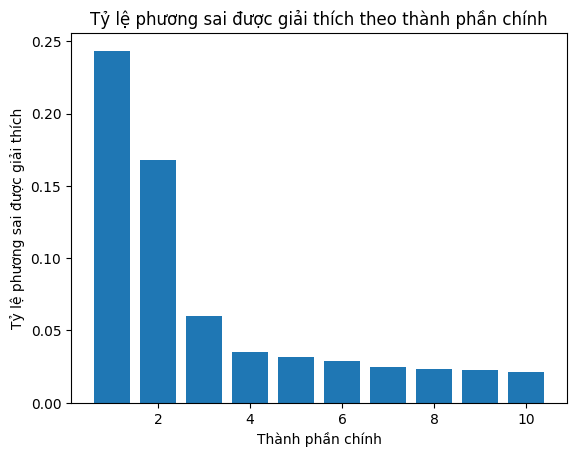

In [ ]:
# Biểu đồ biểu diễn tỷ lệ phương sai giải thích bởi từng thành phần chính
explained_variance_ratio = pca.explained_variance_ratio_
plt.bar(range(1, n_components + 1), explained_variance_ratio)
plt.xlabel('Thành phần chính')
plt.ylabel('Tỷ lệ phương sai được giải thích')
plt.title('Tỷ lệ phương sai được giải thích theo thành phần chính')
plt.show()

In [ ]:
pca.explained_variance_ratio_

array([0.2434421 , 0.1681994 , 0.05991832, 0.03535288, 0.03174876,
       0.02863467, 0.02454895, 0.02347538, 0.02241554, 0.02102827])

In [ ]:
pca.n_components_

10

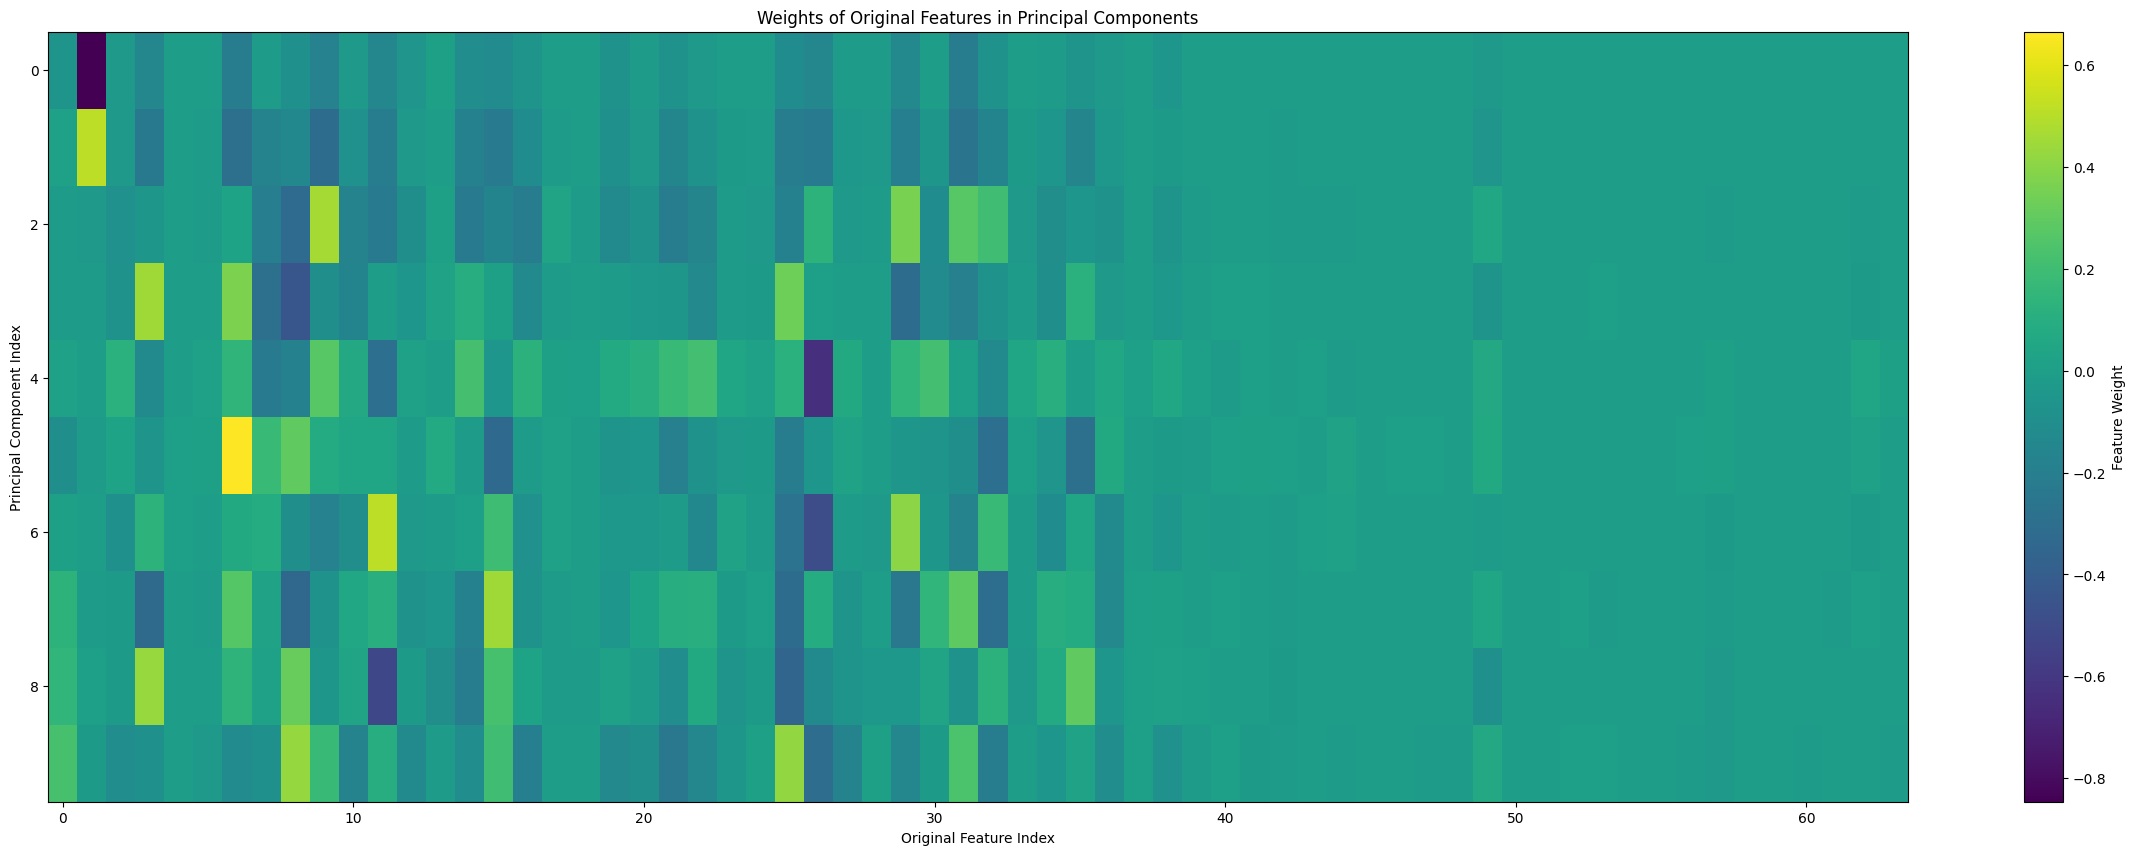

In [ ]:
weights = pca.components_

plt.figure(figsize=(30, 10))
plt.imshow(weights , cmap='viridis', aspect='auto')
plt.colorbar(label='Feature Weight')
plt.xlabel('Original Feature Index')
plt.ylabel('Principal Component Index')
plt.title('Weights of Original Features in Principal Components')
plt.show()

In [ ]:
# Chọn ngưỡng trọng số
threshold = 0.3
# Tìm các đặc trưng có trọng số lớn hơn hoặc nhỏ hơn ngưỡng
significant_features = df_new.columns[np.unique(np.where((weights[:]>threshold) | (weights[:]< -threshold))[1])]
# In ra các đặc trưng quan trọng
print("Các đặc trưng quan trọng:")
print(significant_features)

Các đặc trưng quan trọng:
Index(['Khóa', 'Cơ sở dữ liệu', 'Lập trình hướng đối tượng',
       'Nguyên lý hệ điều hành', 'Ngôn ngữ lập trình', 'Toán rời rạc',
       'Giải tích 1', 'Kiến trúc máy tính', 'Kỹ thuật số', 'Tin đại cương'],
      dtype='object', name='Tên HP')


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Huấn luyện mô hình Logistic Regression trên dữ liệu huấn luyện đã giảm chiều
logistic_model = LogisticRegression()
logistic_model.fit(X_train_pca, y_train)

# Đánh giá mô hình trên dữ liệu kiểm tra
y_pred_logistic = logistic_model.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred_logistic)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
print("Accuracy:", accuracy)

Accuracy: 0.7335581787521079


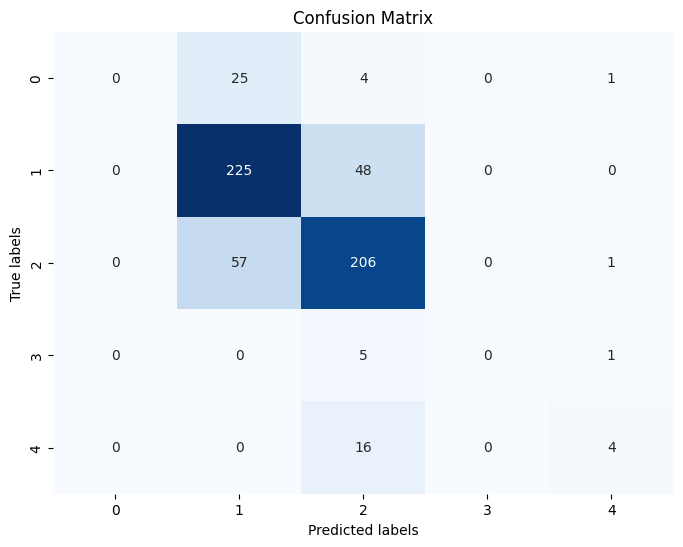

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Tính ma trận nhầm lẫn
cm = confusion_matrix(y_test, y_pred_logistic)

# Vẽ ma trận nhầm lẫn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Huấn luyện mô hình RandomForest Classifier trên dữ liệu huấn luyện đã giảm chiều
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train_pca, y_train)

# Đánh giá mô hình trên dữ liệu kiểm tra
y_pred_random_forest = random_forest_model.predict(X_test_pca)
accuracy_random_forest = accuracy_score(y_test, y_pred_random_forest)
print("Random Forest Accuracy:", accuracy_random_forest)

Random Forest Accuracy: 0.7790893760539629


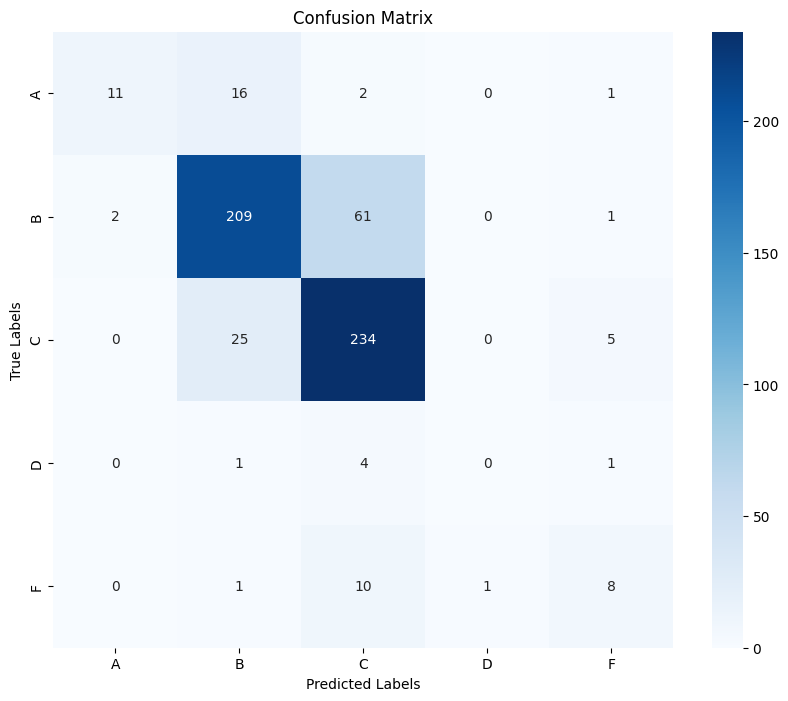

In [ ]:
# Tính ma trận nhầm lẫn
conf_matrix = confusion_matrix(y_test, y_pred_random_forest)

# Hiển thị ma trận nhầm lẫn dưới dạng heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Generate classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_random_forest))

Classification Report:
              precision    recall  f1-score   support

           A       0.85      0.37      0.51        30
           B       0.83      0.77      0.80       273
           C       0.75      0.89      0.81       264
           D       0.00      0.00      0.00         6
           F       0.50      0.40      0.44        20

    accuracy                           0.78       593
   macro avg       0.59      0.48      0.51       593
weighted avg       0.78      0.78      0.77       593



In [ ]:
from sklearn.svm import SVC

# Huấn luyện mô hình SVM trên dữ liệu huấn luyện đã giảm chiều
svm_model = SVC()
svm_model.fit(X_train_pca, y_train)

# Đánh giá mô hình trên dữ liệu kiểm tra
y_pred_svm = svm_model.predict(X_test_pca)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", accuracy_svm)

SVM Accuracy: 0.7571669477234402


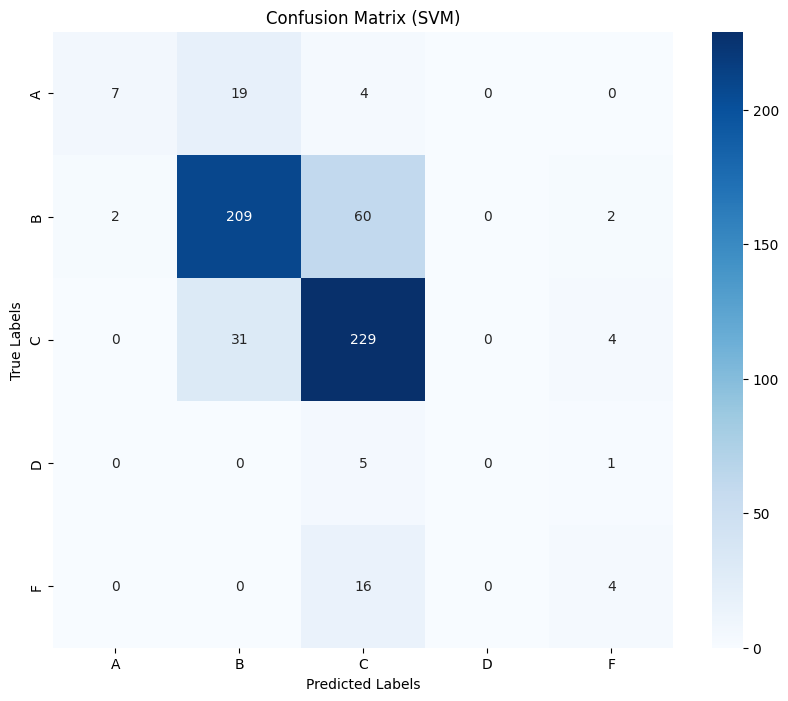

In [ ]:
# Tính ma trận nhầm lẫn
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

# Hiển thị ma trận nhầm lẫn dưới dạng heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (SVM)')
plt.show()